### Setting Up Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
Data = pd.read_excel('/content/gdrive/My Drive/Customer_Churn.xlsx')

In [3]:
display(pd.DataFrame(Data))

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,zero,153252,0,23,368403,597,1,6,very_sat,little,actively_looking_into_it,STAY
19996,one,107126,71,82,237397,609,5,2,very_sat,very_little,no,STAY
19997,zero,78529,0,66,172589,275,0,2,unsat,very_high,considering,LEAVE
19998,zero,78674,47,41,572406,288,4,2,very_unsat,little,considering,LEAVE


Describe and summarize the data. This is very useful as a preliminary step to capture basic data property. Distribution analysis, statistical exploration, correlation analysis, suitable transformation of variables and elimination of redundant variables, management of missing values.

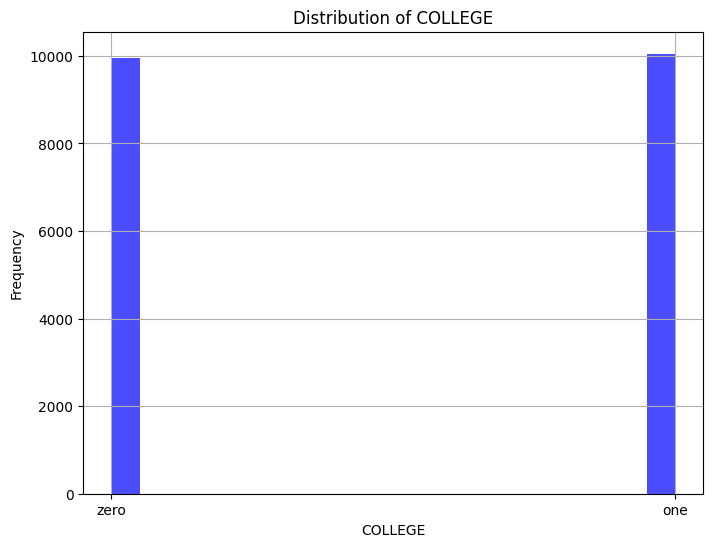

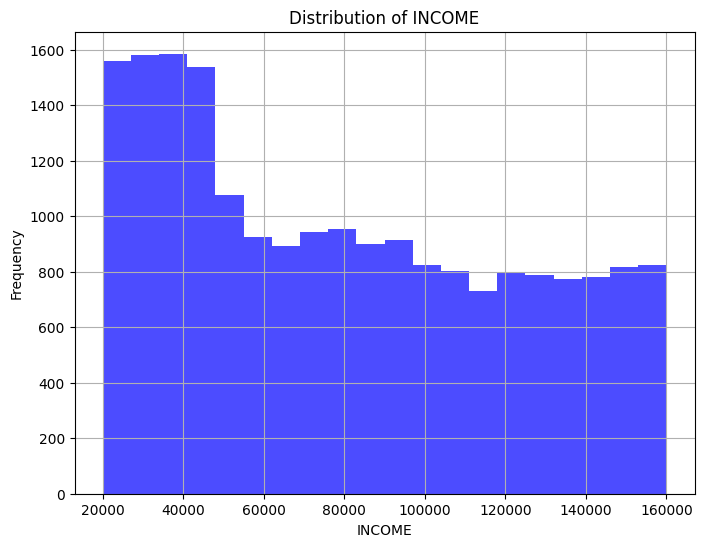

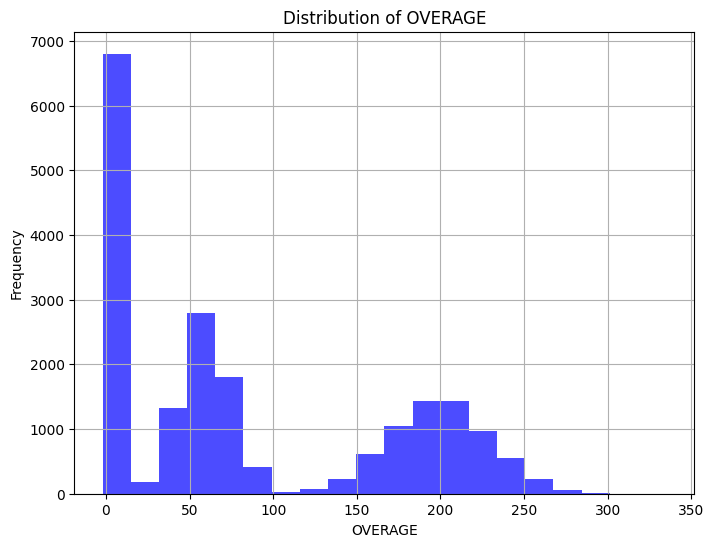

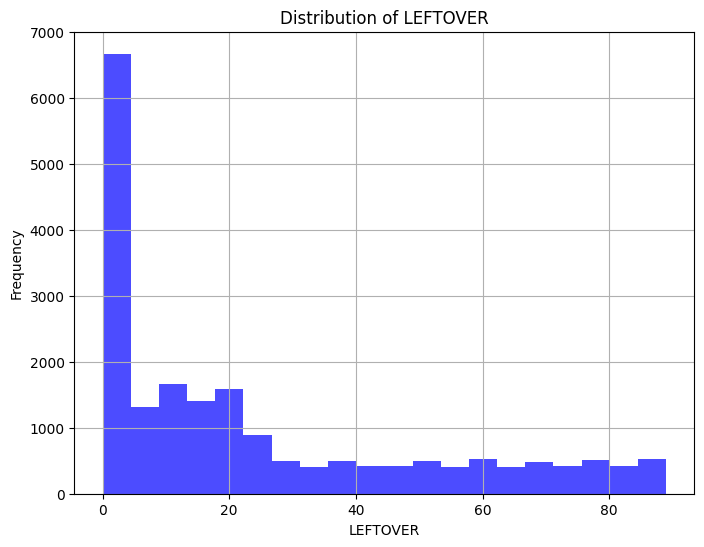

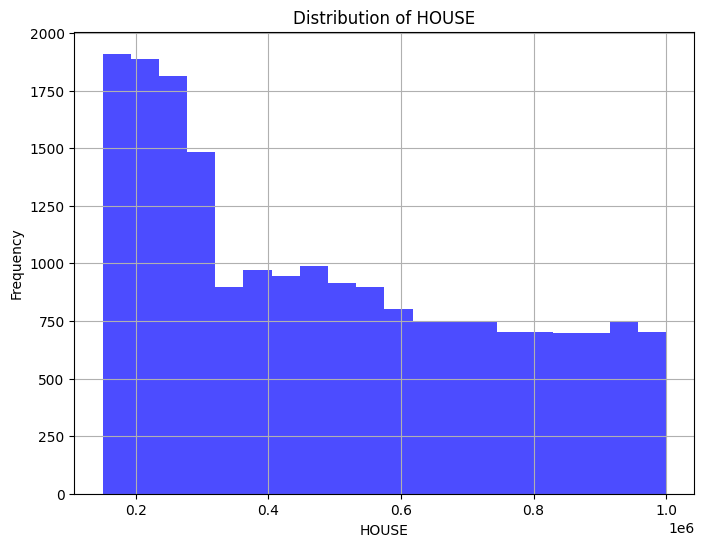

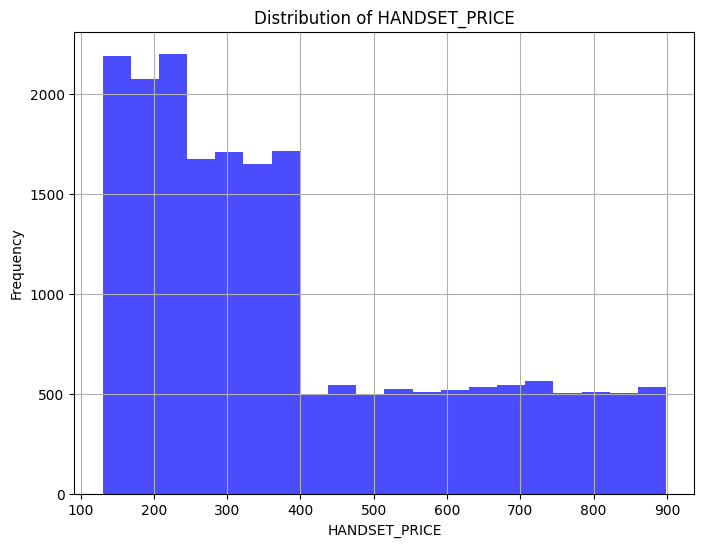

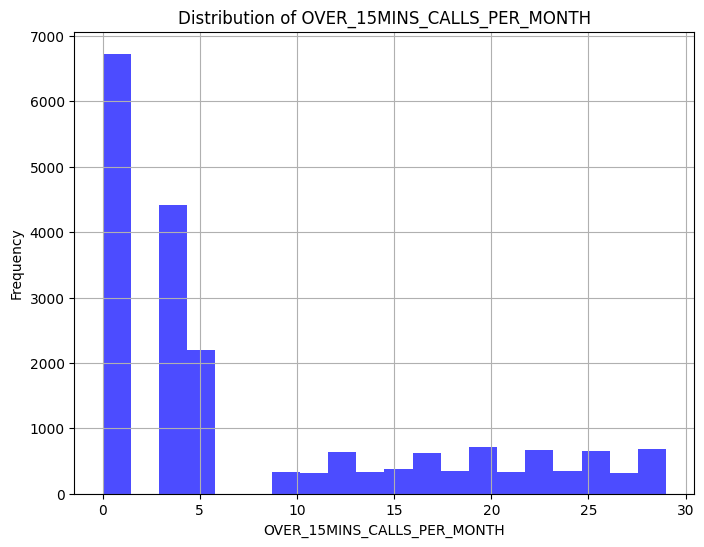

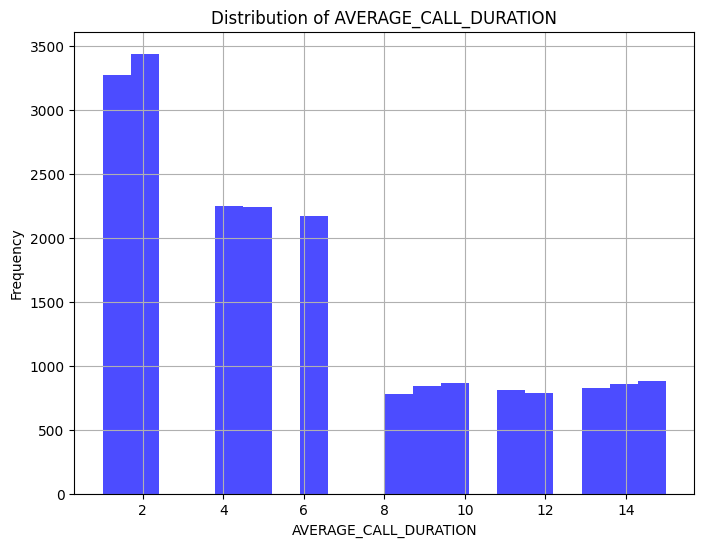

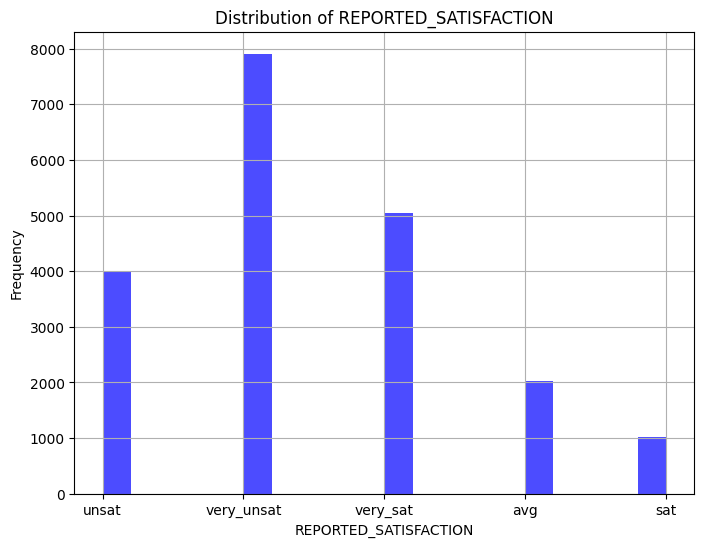

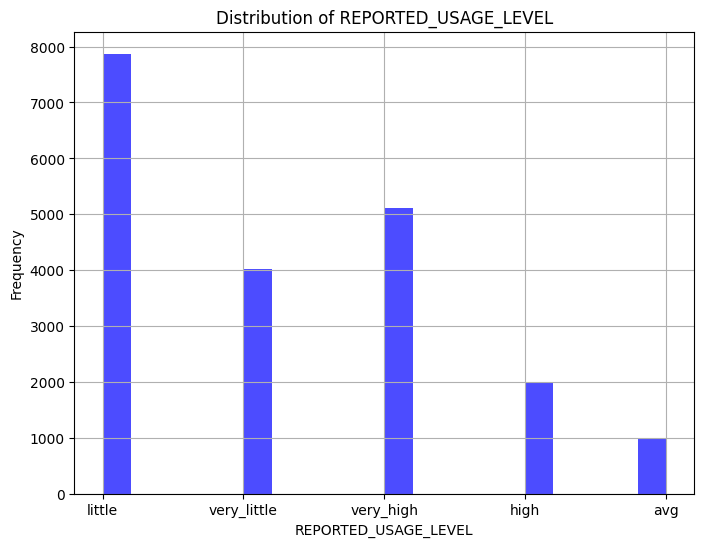

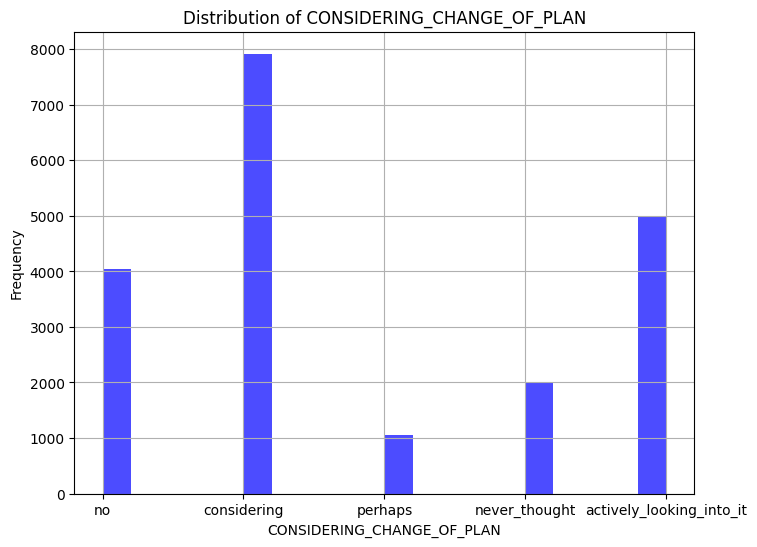

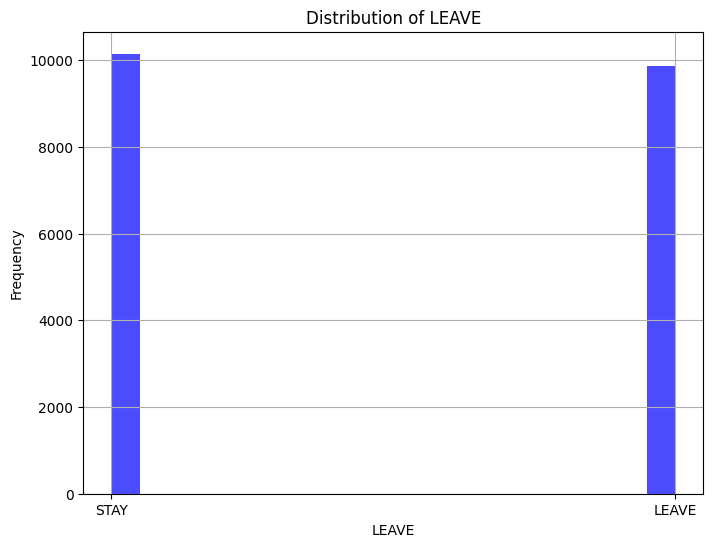

KeyError: ignored

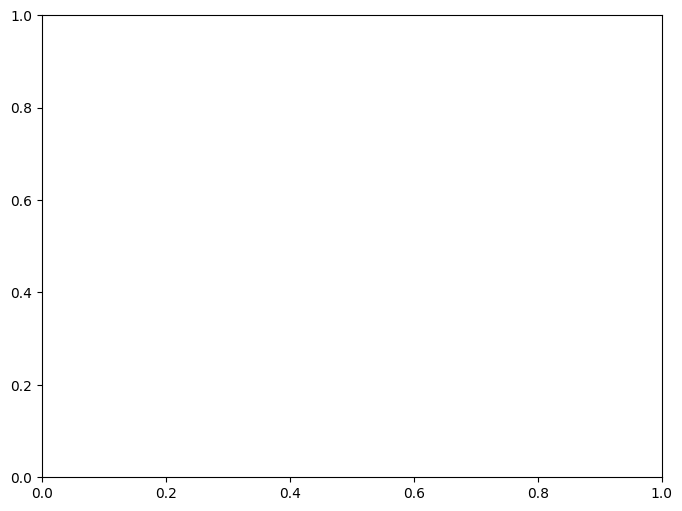

In [5]:
import matplotlib.pyplot as plt

# List of numerical columns you want to analyze
numerical_columns = ['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE']

# Create histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    Data[col].hist(bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    Data.boxplot(column=col, vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


Produce at least two visualizations of the data that are meaningful to the report. Explain (in 1-2 sentence(s) for each figure) why do you think them are meaningful

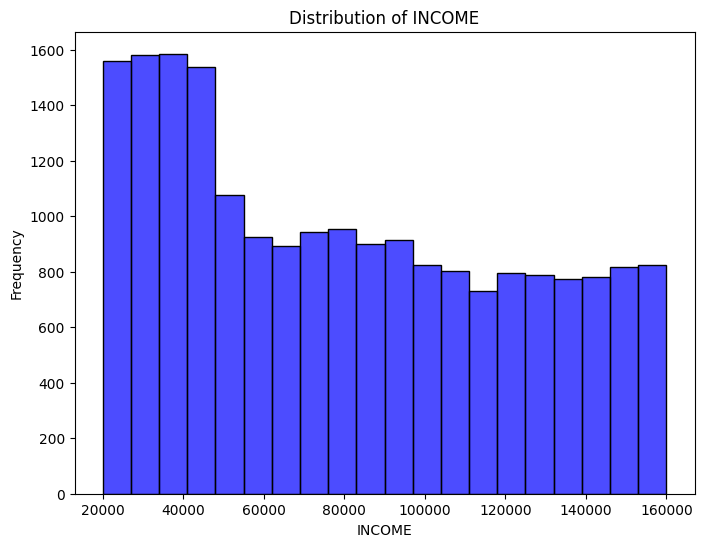

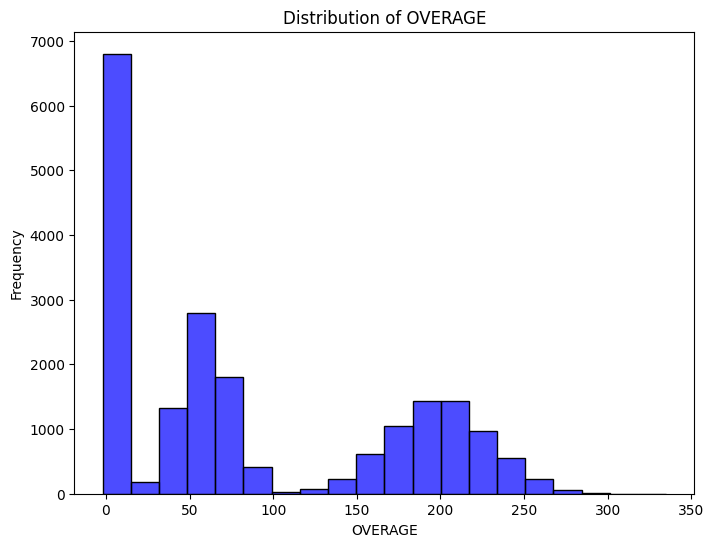

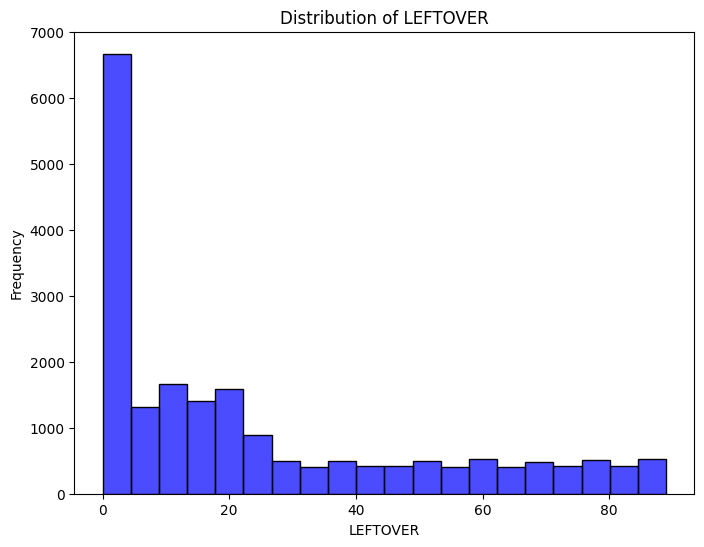

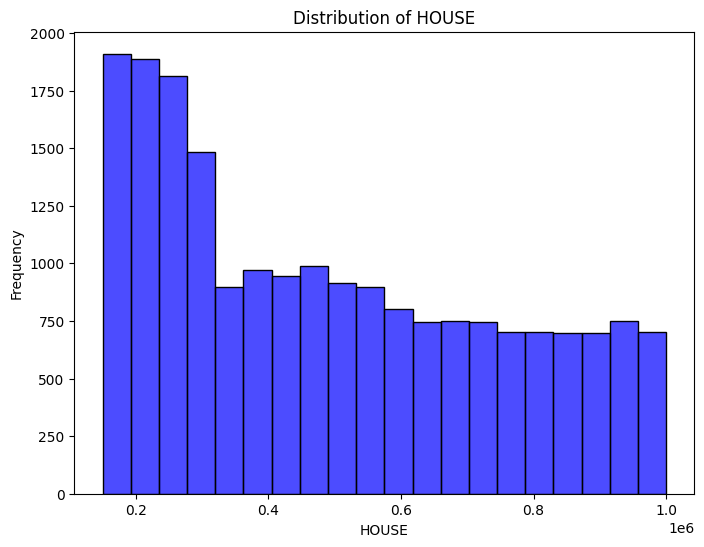

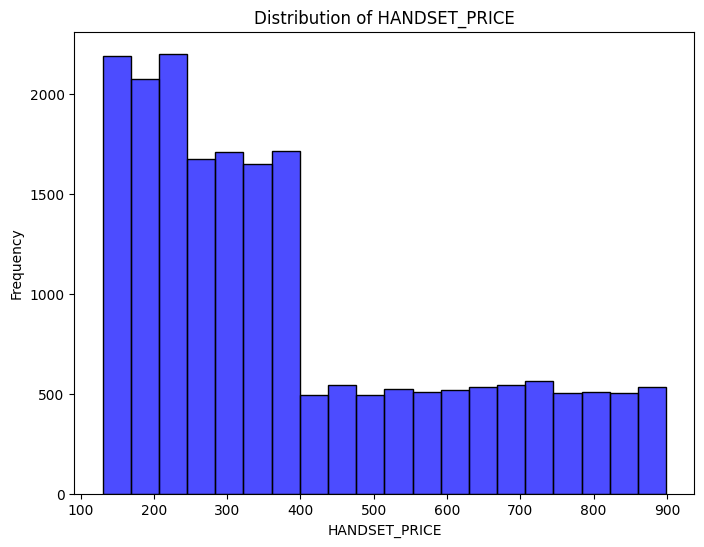

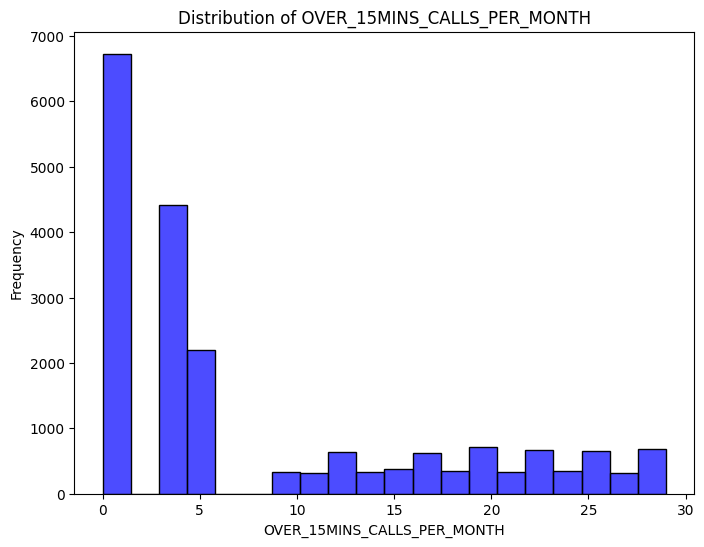

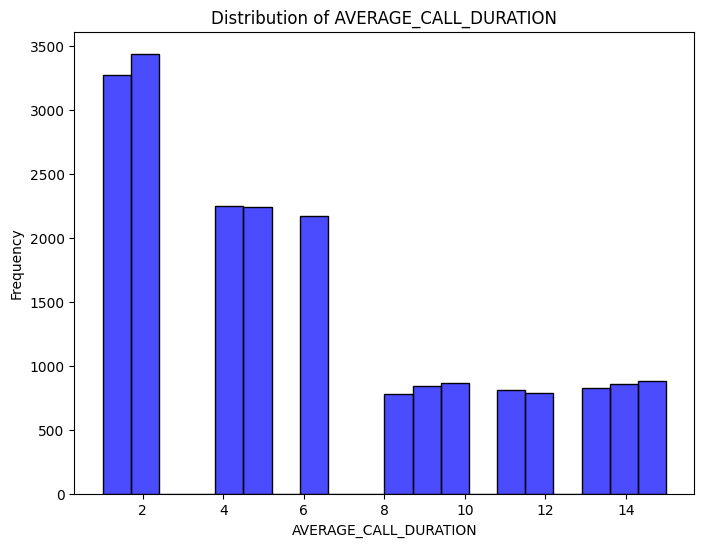

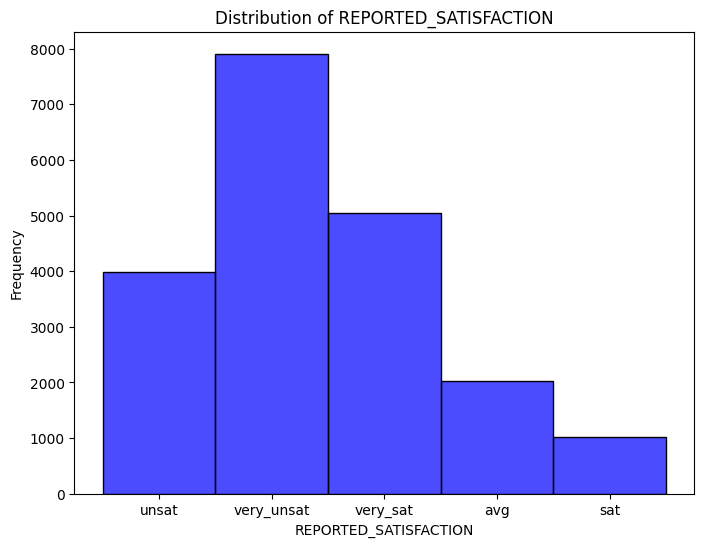

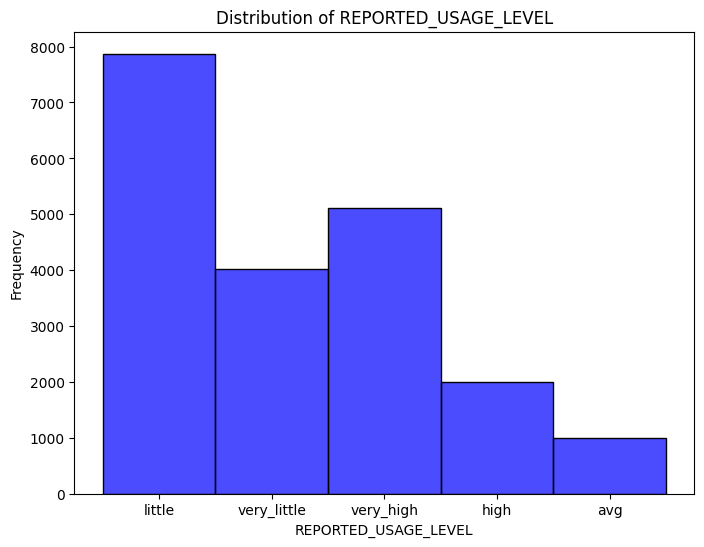

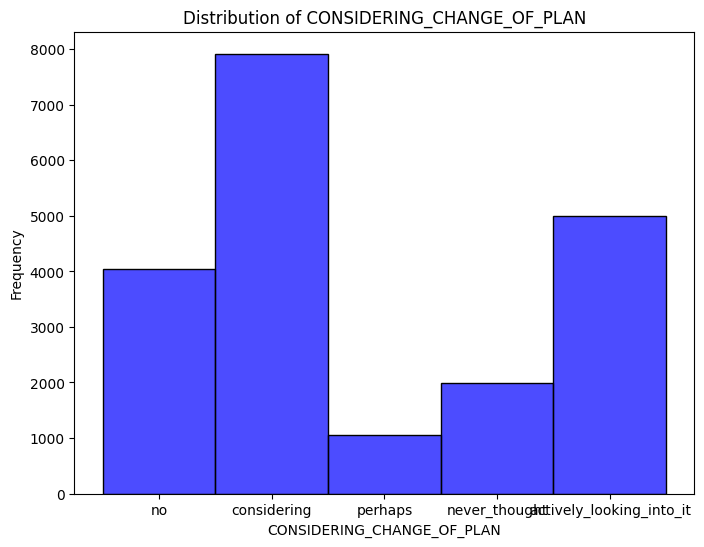

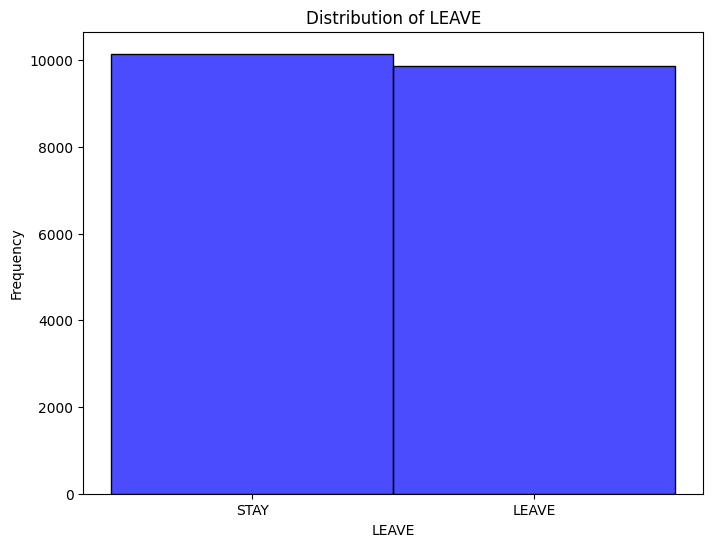

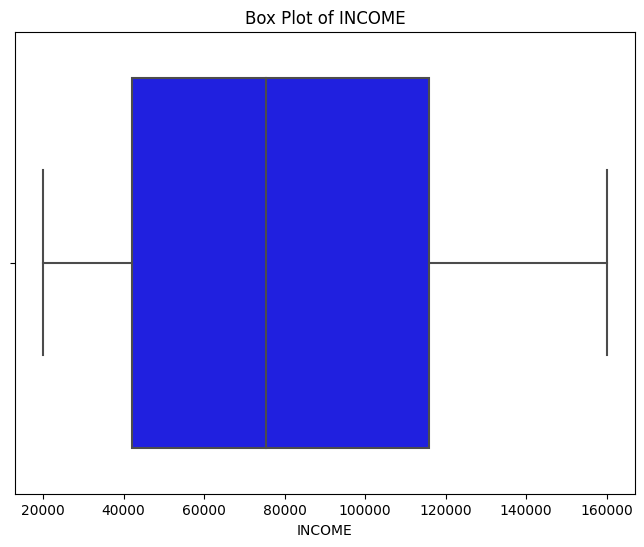

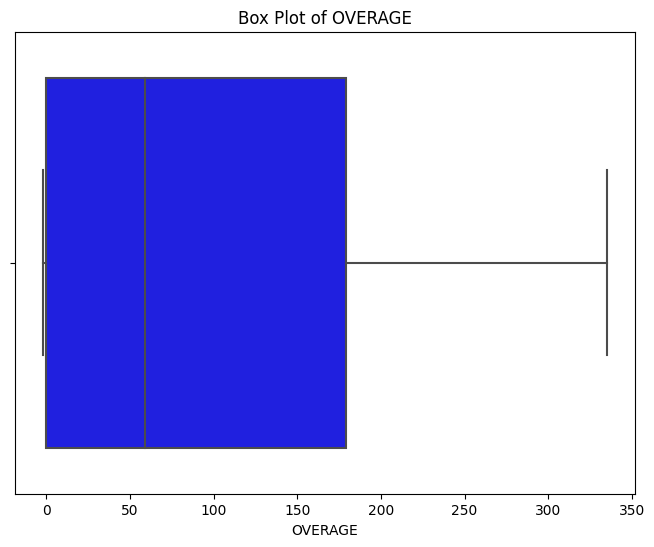

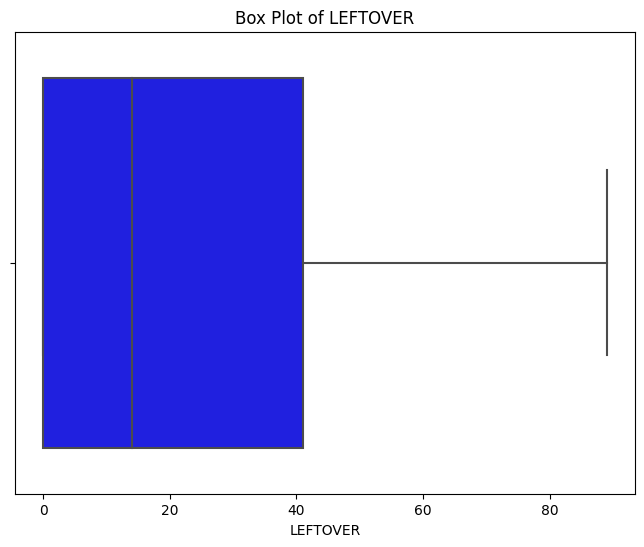

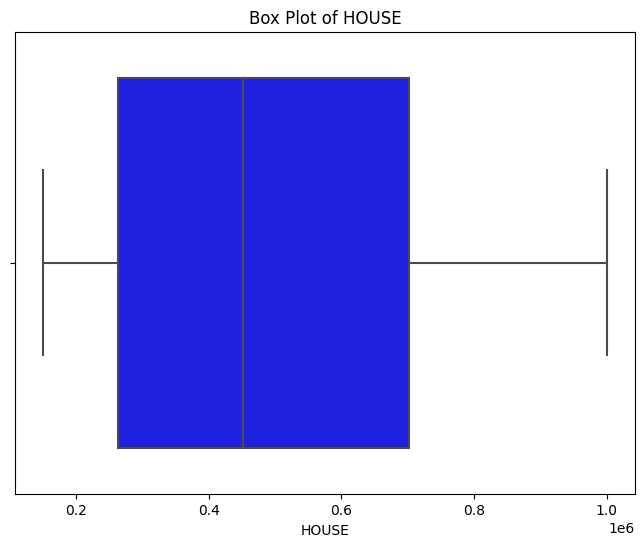

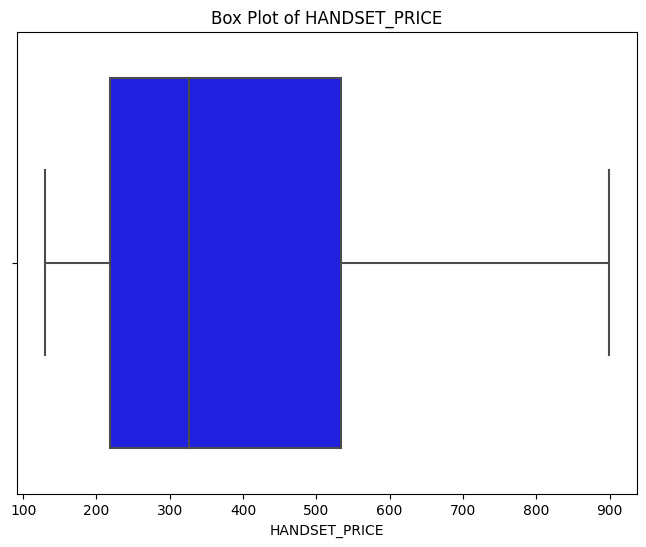

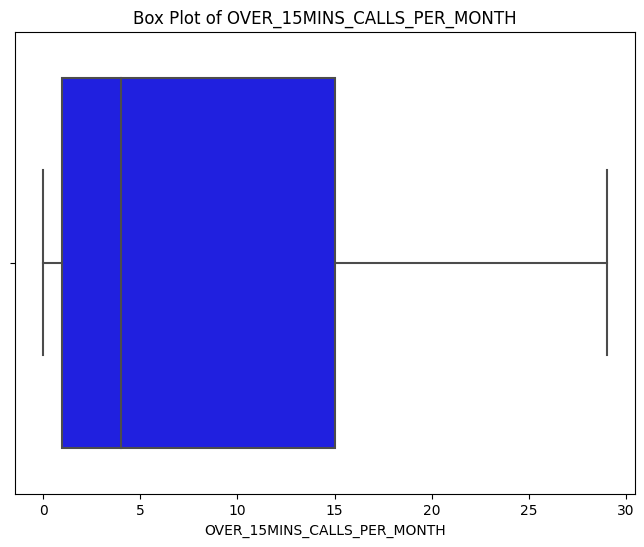

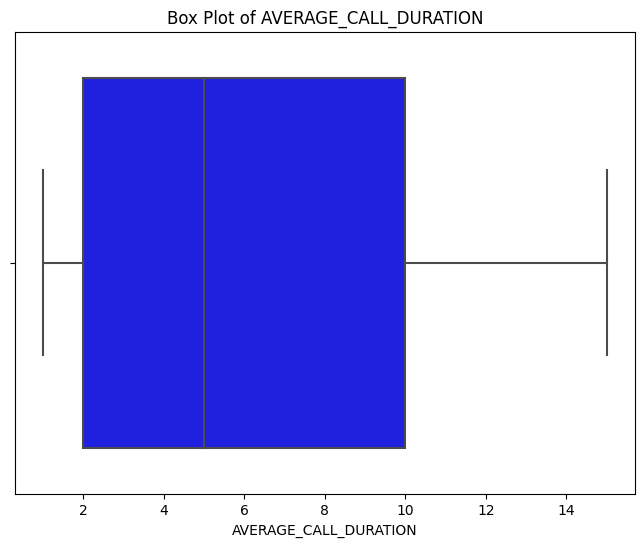

TypeError: ignored

<Figure size 800x600 with 0 Axes>

In [6]:
import seaborn as sns

# List of numerical columns you want to analyze
numerical_columns = ['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE']

# Create histograms for each numerical column using Seaborn
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(Data[col], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for each numerical column using Seaborn
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Data[col], color='blue', orient='h')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model Accuracy: 63.32%
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      2055
           1       0.62      0.62      0.62      1945

    accuracy                           0.63      4000
   macro avg       0.63      0.63      0.63      4000
weighted avg       0.63      0.63      0.63      4000



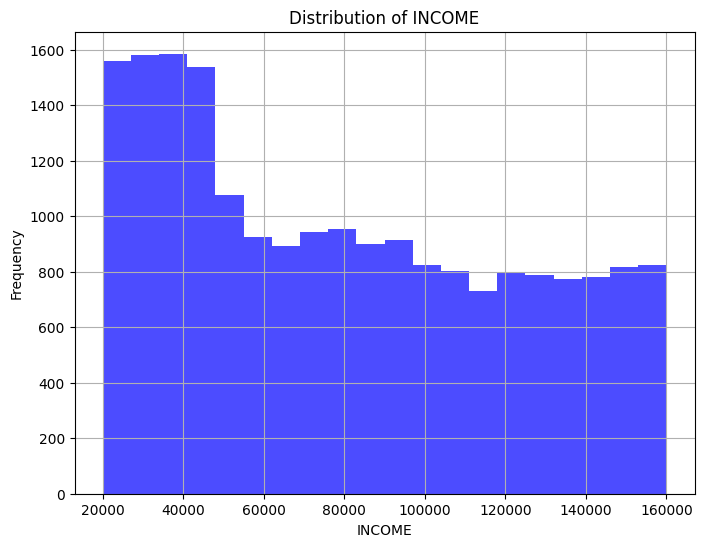

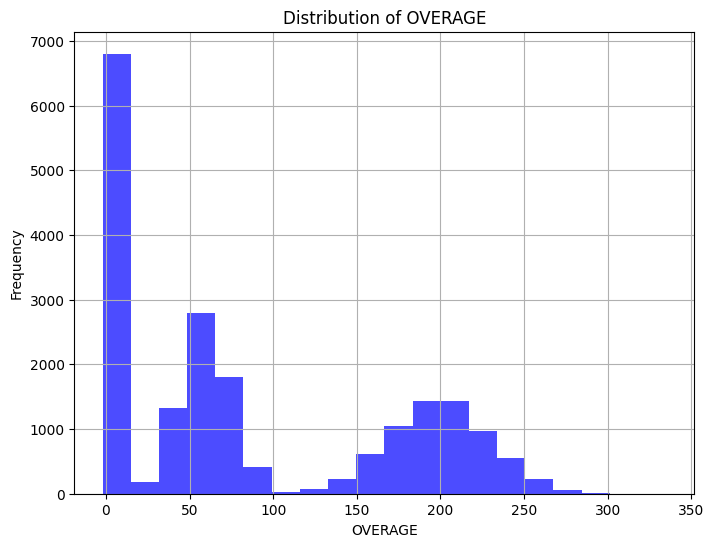

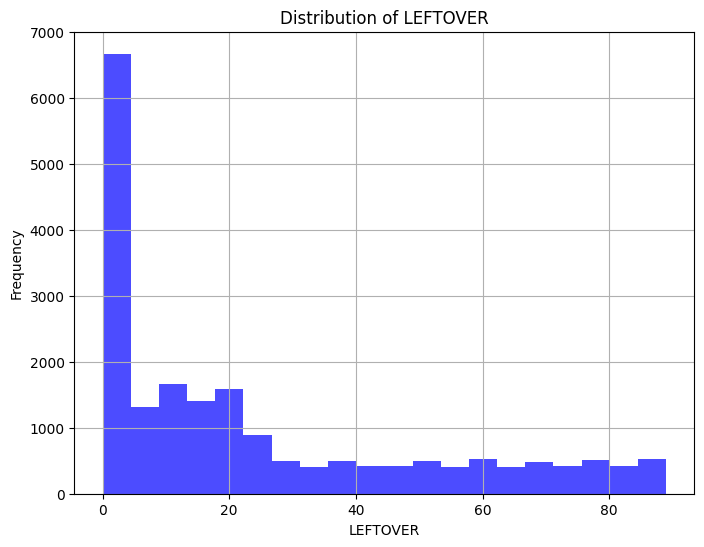

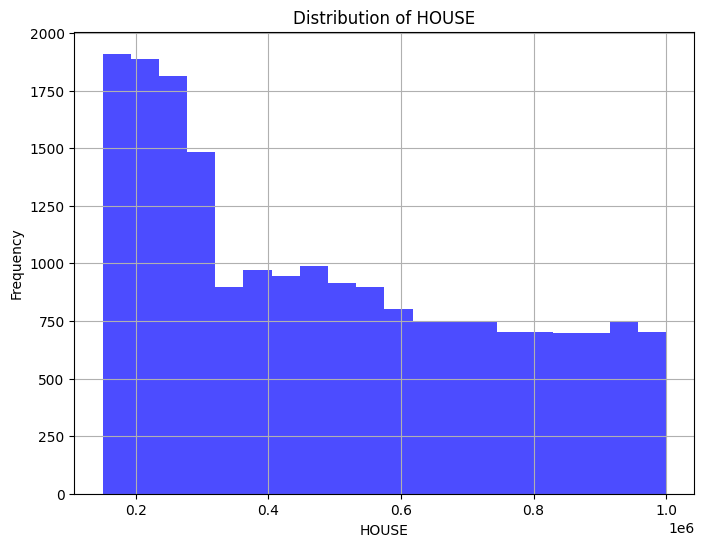

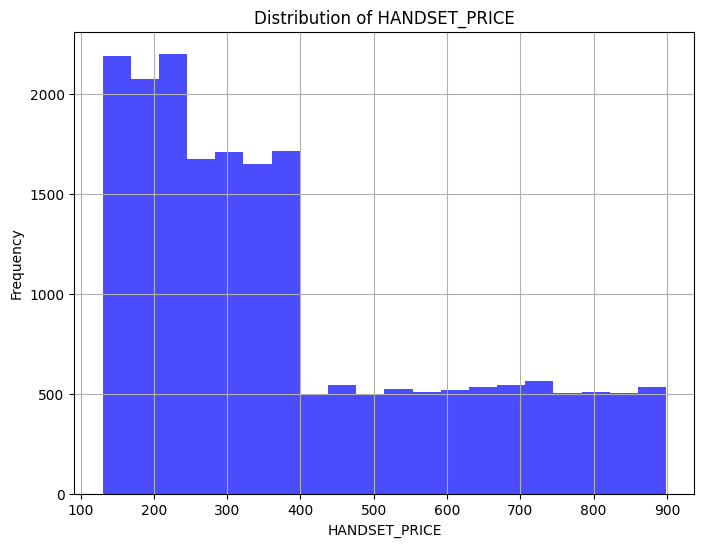

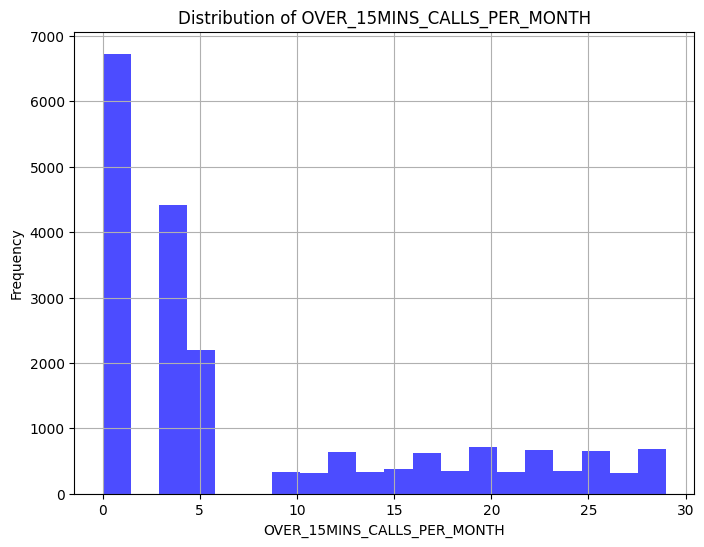

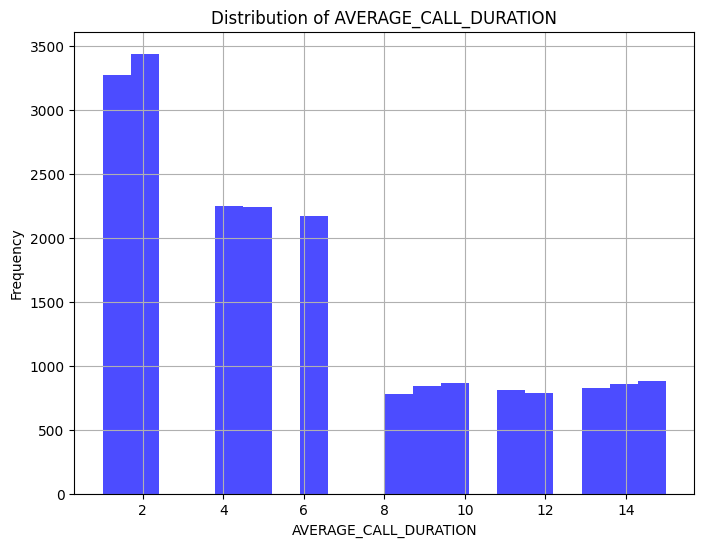

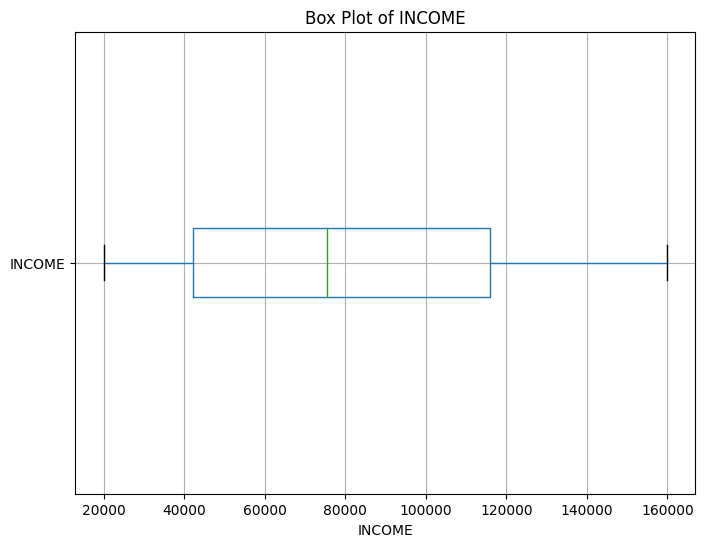

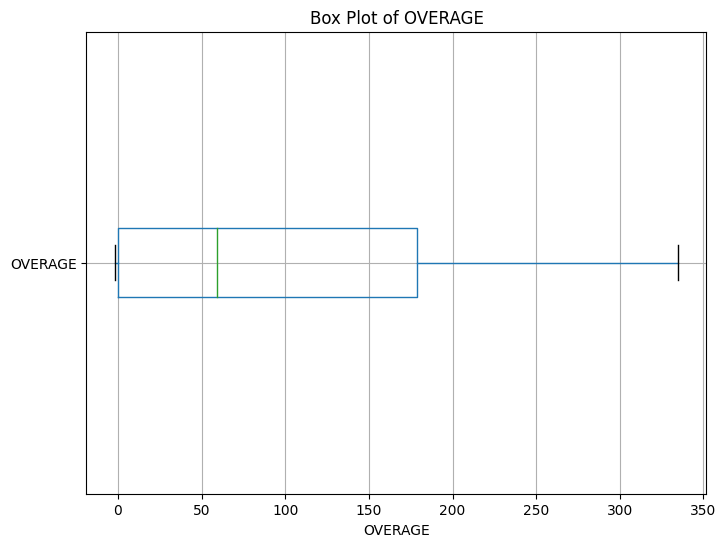

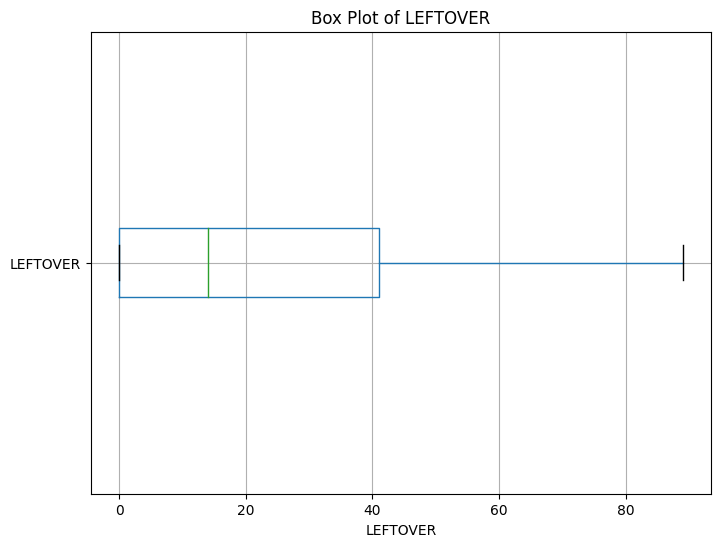

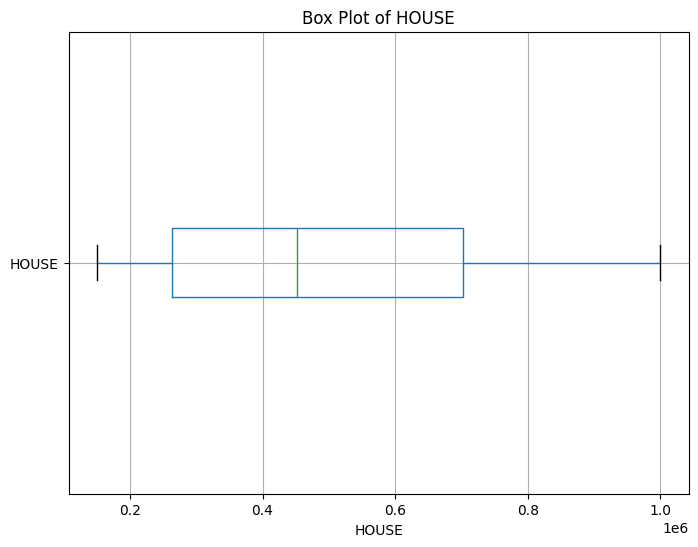

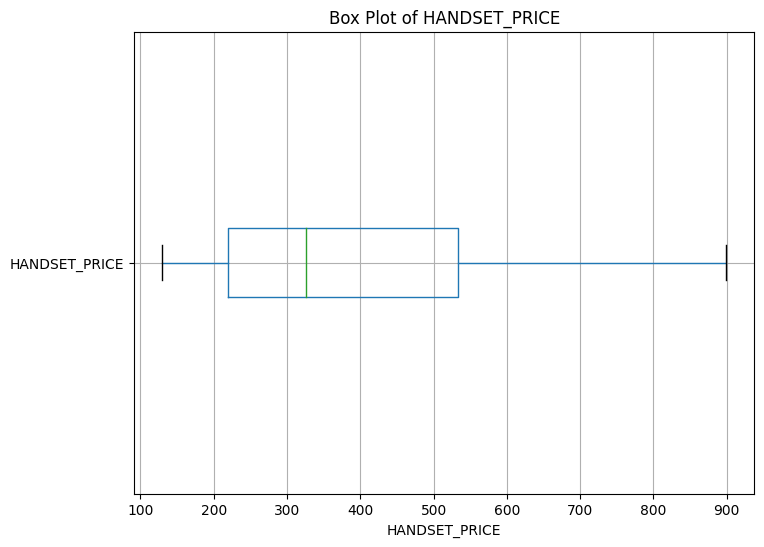

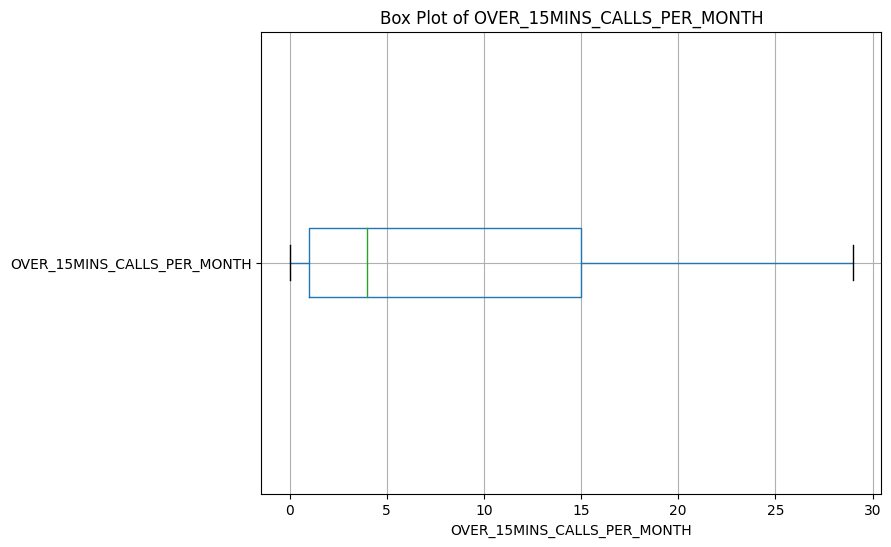

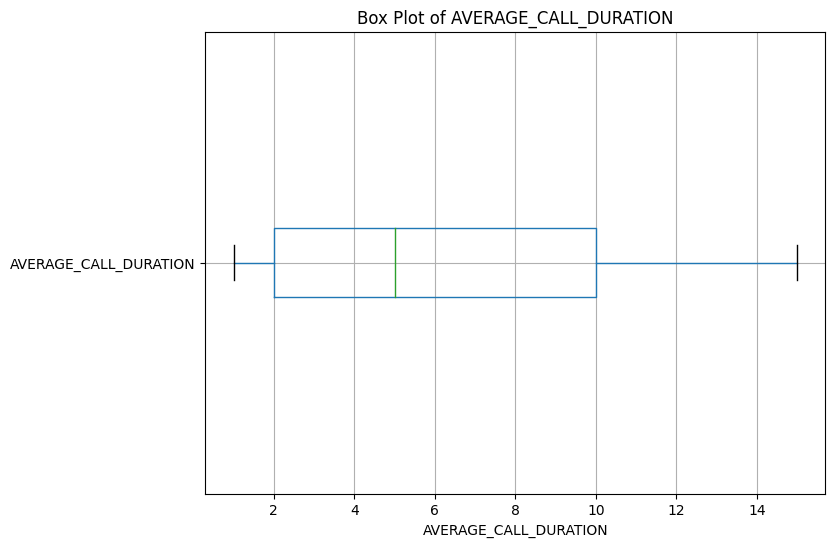

Decision Tree Results:
Model Accuracy: 61.42%
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.62      0.62      2055
           1       0.60      0.61      0.61      1945

    accuracy                           0.61      4000
   macro avg       0.61      0.61      0.61      4000
weighted avg       0.61      0.61      0.61      4000

K-Nearest Neighbors (KNN) Results:
Model Accuracy: 58.10%
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59      2055
           1       0.57      0.59      0.58      1945

    accuracy                           0.58      4000
   macro avg       0.58      0.58      0.58      4000
weighted avg       0.58      0.58      0.58      4000

Logistic Regression Results:
Model Accuracy: 63.32%
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      2055
         

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras



# Define categorical columns
categorical_columns = ['COLLEGE', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# Define numerical columns
numerical_columns = ['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
                     'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION']

# Define the target variable
target_variable = 'LEAVE'

# Encode categorical variables using One-Hot Encoding
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_data_encoded = encoder.fit_transform(Data[categorical_columns])

# Get the feature names for one-hot encoded columns
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Combine one-hot encoded categorical features with numerical features
X_encoded = pd.DataFrame(data=categorical_data_encoded, columns=encoded_column_names)
X = pd.concat([X_encoded, Data[numerical_columns]], axis=1)
y = Data[target_variable]

#map the target variables to 0 and 1 to fix float to string error
y = Data[target_variable].map({'STAY': 0, 'LEAVE': 1})


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)

# Visualize histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    Data[col].hist(bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    Data.boxplot(column=col, vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


# Create and train a Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Evaluate the Decision Tree model on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_rep_decision_tree = classification_report(y_test, y_pred_decision_tree)

print("Decision Tree Results:")
print(f"Model Accuracy: {accuracy_decision_tree * 100:.2f}%")
print("Classification Report:\n", classification_rep_decision_tree)


# Create and train a KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluate the KNN model on the test set
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Results:")
print(f"Model Accuracy: {accuracy_knn * 100:.2f}%")
print("Classification Report:\n", classification_rep_knn)


# Create and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Logistic Regression Results:")
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)

# Create and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict the outcomes on the test set using the Linear Regression model
y_pred_linear = (linear_model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the accuracy and generate a classification report for the Linear Regression model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
classification_rep_linear = classification_report(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Model Accuracy: {accuracy_linear * 100:.2f}%")
print("Classification Report:\n", classification_rep_linear)

# Create and train a Neural Network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Neural Network model on the test set
_, accuracy_nn = model.evaluate(X_test, y_test)
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
classification_rep_nn = classification_report(y_test, y_pred_nn)

print("Neural Network Results:")
print(f"Model Accuracy: {accuracy_nn * 100:.2f}%")
print("Classification Report:\n", classification_rep_nn)





In [21]:
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/Customer_Churn.xlsx')

print (df.head()) #print header of each column

print("DESCRIPTION")
print (df.describe()) #describe the statistics of the data

print("MISSING VALUES")
print (df.isnull()) #check for missing values





  COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0    zero   31953        0         6  313378            161   
1     one   36147        0        13  800586            244   
2     one   27273      230         0  305049            201   
3    zero  120070       38        33  788235            780   
4     one   29215      208        85  224784            241   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTION  \
0                            0                      4                 unsat   
1                            0                      6                 unsat   
2                           16                     15                 unsat   
3                            3                      2                 unsat   
4                           21                      1            very_unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  LEAVE  
0               little                         no   STAY  
1               little      

In [9]:
import pandas as pd
from scipy.stats import chi2_contingency


# Define the target variable
target_variable = 'LEAVE'

# Define the categorical columns you want to test for correlation
categorical_columns_to_test =['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE']

# Create a contingency table for each categorical variable
correlation_results = {}

for column in categorical_columns_to_test:
    contingency_table = pd.crosstab(Data[target_variable], Data[column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    correlation_results[column] = {'Chi-Squared': chi2, 'P-Value': p}

# Print the correlation results
print("Correlation Analysis:")
for column, results in correlation_results.items():
    print(f"{column}:")
    print(f"Chi-Squared: {results['Chi-Squared']:.2f}")
    print(f"P-Value: {results['P-Value']:.4f}")
    if results['P-Value'] < 0.05:
        print("Statistically significant correlation.")
    else:
        print("No statistically significant correlation.")
    print()


Correlation Analysis:
COLLEGE:
Chi-Squared: 4.19
P-Value: 0.0407
Statistically significant correlation.

INCOME:
Chi-Squared: 18564.02
P-Value: 0.4490
No statistically significant correlation.

OVERAGE:
Chi-Squared: 1468.37
P-Value: 0.0000
Statistically significant correlation.

LEFTOVER:
Chi-Squared: 449.37
P-Value: 0.0000
Statistically significant correlation.

HOUSE:
Chi-Squared: 19685.93
P-Value: 0.5309
No statistically significant correlation.

HANDSET_PRICE:
Chi-Squared: 990.08
P-Value: 0.0000
Statistically significant correlation.

OVER_15MINS_CALLS_PER_MONTH:
Chi-Squared: 987.69
P-Value: 0.0000
Statistically significant correlation.

AVERAGE_CALL_DURATION:
Chi-Squared: 250.00
P-Value: 0.0000
Statistically significant correlation.

REPORTED_SATISFACTION:
Chi-Squared: 8.56
P-Value: 0.0730
No statistically significant correlation.

REPORTED_USAGE_LEVEL:
Chi-Squared: 1.02
P-Value: 0.9062
No statistically significant correlation.

CONSIDERING_CHANGE_OF_PLAN:
Chi-Squared: 3.36
P-Valu